
# Complexity and Asymptotic Notation

Algorithms are a central object in Computer Science. They describe how to transform input data to output data, typically to solve a certain problem of interest (e.g., sorting a list of numbers in ascending order). While some algorithms are designed to terminate (e.g., sorting), some are designed to never terminate. Their input and output are streams of data (e.g., a database with add and query operations).

We will not go into details about how these algorithms are described as mathematical objects, but refer the interested reader to a quick overview of the most widely used model, the Turing machine, at [Wikipedia](https://en.wikipedia.org/wiki/Turing_machine) and more detailed literature, e.g., here (coming...).

Once we have an algorithm, and maybe even its implementation, in this course in Python, we are interested in how good it is. This is typically measured in terms of the computation time and memory space it requires to run. But other complexity/performance measures are useful in other contexts. For example, for distributed algorithms that run on several machines, the number and size of exchanged messages is relevant.

Since we often want to compare algorithms (and not a particular input on particular machine with a particular implementation of the algorithm), one often abstracts away details of these complexity measures: this allows one to focus on the essentials and make algorithms comparable in the first place.


## Complexity as a function

Assume that we have determined un upper bound $f$ on the time $T$, say in seconds, it takes for an algorithm to sort a list of length $n$. Assume it is of this form:

$$
T(n) \leq f(n) = 0.1 \cdot n^2 + 0.2 \cdot n + 12
$$

Lets look at the 3 additive terms independently in a plot:

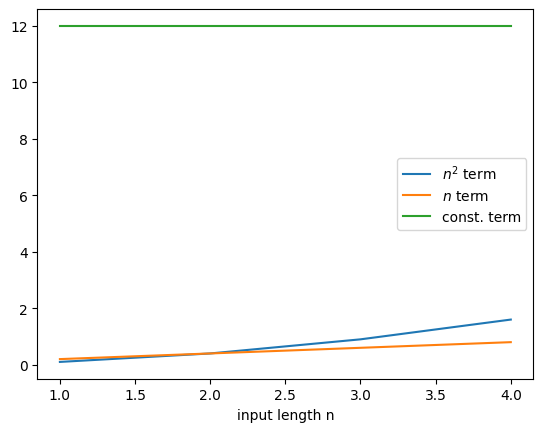

In [13]:
# %pip install numpy
# %pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

n = np.arange(1, 5)
plt.plot(n, 0.1*n**2, label=r'$n^2$ term')
plt.plot(n, 0.2*n, label=r'$n$ term')
plt.plot(n, 12 + 0*n, label=r'const. term')
plt.xlabel('input length n')
plt.legend()
plt.show()


We see that initially, the constant term dominates by far, with the next bigger contribution being the linear one, and then the quadratic.

However, if we go on for larger input sizes, the situation looks a bit different:

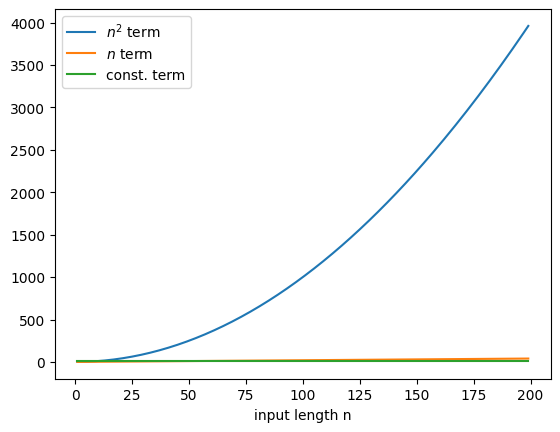

In [14]:
n = np.arange(1, 200)
plt.plot(n, 0.1*n**2, label=r'$n^2$ term')
plt.plot(n, 0.2*n, label=r'$n$ term')
plt.plot(n, 12 + 0*n, label=r'const. term')
plt.xlabel('input length n')
plt.legend()
plt.show()

It is by far the quadratic term that now determines the bound $f$. We can thus simply say, the asymptotic time complexity is bounded by a quadratic term in $n$.

This is formalized in the following.

## Big-O Notation ($O$)

**Definition**  
For a function $f(n)$, we say $f(n)$ is $O(g(n))$ if there exist
constants $c > 0$ and $n_0 \geq 0$ such that:

$$
f(n) \leq c \cdot g(n) \quad \text{for all } n \geq n_0
$$

**Intuition**  
Big-O gives an upper bound on the growth of a function for large $n$.

**Example**  
Show that $f(n) = 0.1n^2 + 0.2n + 12$ is in $O(n^2)$. One also writes $f(n) = O(n^2)$, but be carful that this equality sign is not symmetric like the usual equality sign.

**Proof**  
We want to find constants $c$ and $n_0$ such that:

$$
0.1n^2 + 0.2n + 12 \leq c \cdot n^2 \quad \text{for all } n \geq n_0
$$

Divide both sides by $n^2 > 0$. Then the above is equivalent to:

$$
0.1 + \tfrac{0.2}{n} + \frac{12}{n^2} \leq c
$$

For $n \geq 12$,

$$
0.1 + \tfrac{0.2}{n} + \frac{12}{n^2} \leq 0.1 + 0.2 + 1 = 1.3
$$

Thus if we choose $c = 1.3$ and $n_0 = 12$, the first inequality in the proof is fulfilled.  
Therefore, $f(n) = O(n^2)$.


## Big-Omega Notation ($\Omega$)

**Definition**  
For a function $f(n)$, we say $f(n)$ is $\Omega(g(n))$ if there
exist constants $c > 0$ and $n_0 \geq 0$ such that:

$$
f(n) \geq c \cdot g(n) \quad \text{for all } n \geq n_0
$$

**Intuition**  
Big-Omega gives a lower bound on growth. We typically want to use it on lower bounds of complexity bounds. For example, we would typically not apply it to the upper time bound $f(n) = 0.1n^2 + 0.2n + 12$ from before, but on a lower time bound.

**Example**
Assume we showed that our algorithm always needs at least $f(n) = 5n + 3$ time (in seconds) to compute an answer.
Show that $f(n) = 5n + 3$ is $\Omega(n)$.

**Proof**  
We want constants $c, n_0$ such that:

$$
5n + 3 \geq c \cdot n \quad \text{for all } n \geq n_0
$$

Divide by $n > 0$:

$$
5 + \tfrac{3}{n} \geq c
$$

For all $n \geq 1$, we have $5 + \tfrac{3}{n} \geq 5$. So we can choose $c = 5$ and $n_0 = 1$ to fulfill the definition of $\Omega$. Therefore, $5n+3 = \Omega(n)$.


## Big-Theta Notation ($\Theta$)

**Definition**  
For a function $f(n)$, we say $f(n)$ is $\Theta(g(n))$ if there
exist constants $c_1, c_2 > 0$ and $n_0 \geq 0$ such that:

$$
c_1 \cdot g(n) \leq f(n) \leq c_2 \cdot g(n) \quad \text{for all } n \geq n_0
$$

**Intuition**  
Big-Theta gives a tight asymptotic bound: "f grows at the same rate as g, up to constant factors."

**Example**  
Show that $f(n) = 5n + 3$ is $\Theta(n)$.

**Proof**  
From the Big-Omega proof we had:

$$
5n + 3 \geq 5n \quad \text{for all } n \geq 1
$$

Using a similar proof we can show Big-O:

$$
5n + 3 \leq 8n \quad \text{for all } n \geq 1
$$

With $c_1 = 5$, $c_2 = 8$, and $n_0 = 1$, both bounds hold:

$$
5n \leq 5n+3 \leq 8n
$$

Therefore, $5n+3 = \Theta(n)$.
